# Technicals to Add
### RSI, MACD, CCI, Bollinger Bands, SMA 9, SMA 20, SMA 50, SMA 100, SMA 200

#### RSI - In Progress
#### MACD - Done
#### CCI - Done
#### Bollinger Bands - Done
#### SMA - In Pogress

In [2]:
import pandas as pd
from pandas_datareader import data as web
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
from pathlib import Path

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install pandas-datareader

You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
!pip install --upgrade pandas

Requirement already up-to-date: pandas in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages (1.0.3)
Requirement not upgraded as not directly required: numpy>=1.13.3 in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages (from pandas) (1.14.3)
Requirement not upgraded as not directly required: python-dateutil>=2.6.1 in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages (from pandas) (2.7.3)
Requirement not upgraded as not directly required: pytz>=2017.2 in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages (from pandas) (2018.4)
Requirement not upgraded as not directly required: six>=1.5 in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages (from python-dateutil>=2.6.1->pandas) (1.11.0)
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
file_path = Path("Resources/TheData.csv")
spy_df = pd.read_csv(file_path)

In [6]:
spy_px = spy_df[["Date", "SPY Close"]]
spy_px.head()

,Date,SPY Close
0,2017-01-23,212.407181
1,2017-01-24,213.769119
2,2017-01-25,215.619400
3,2017-01-26,215.394012
4,2017-01-27,215.055878


## Bollinger Bands

In [7]:
bollinger_window = 20
spy_px['bollinger_mid_band'] = spy_px["SPY Close"].rolling(window=bollinger_window).mean()
spy_px.head()

,Date,SPY Close,bollinger_mid_band
0,2017-01-23,212.407181,NaN
1,2017-01-24,213.769119,NaN
2,2017-01-25,215.619400,NaN
3,2017-01-26,215.394012,NaN
4,2017-01-27,215.055878,NaN


In [8]:
bollinger_std = spy_px["SPY Close"].rolling(window=20).std()
spy_px["bollinger_upper_band"] = spy_px["bollinger_mid_band"] + bollinger_std
spy_px["bollinger_lower_band"] = spy_px["bollinger_mid_band"] - bollinger_std

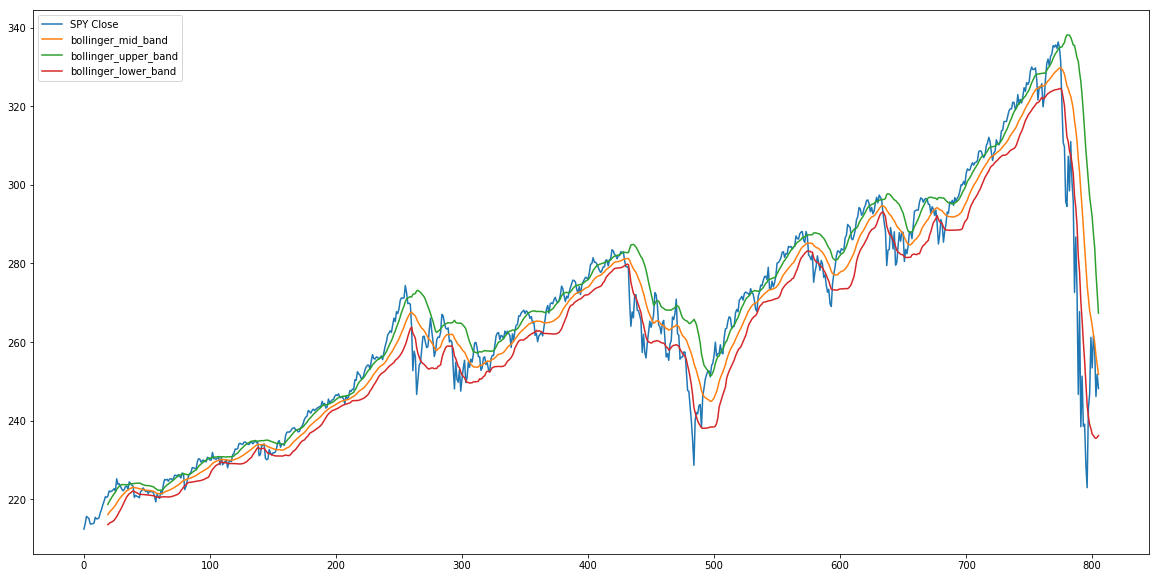

In [9]:
spy_px[["SPY Close",'bollinger_mid_band','bollinger_upper_band','bollinger_lower_band']].plot(figsize=(20,10))

In [10]:
spy_px['bollinger_long'] = np.where(spy_px['SPY Close'] < spy_px['bollinger_lower_band'], 1.0, 0.0)
spy_px['bollinger_short'] = np.where(spy_px['SPY Close'] > spy_px['bollinger_upper_band'], -1.0, 0.0)
spy_px['bollinger_signal'] = spy_px['bollinger_long'] + spy_px['bollinger_short']

In [11]:
spy_px.iloc[20:25, :]

,Date,SPY Close,bollinger_mid_band,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
20,2017-02-21,222.118896,216.595741,219.359898,213.831584,0.0,-1.0,-1.0
21,2017-02-22,221.921646,217.003368,219.925362,214.081373,0.0,-1.0,-1.0
22,2017-02-23,222.071915,217.325993,220.437230,214.214757,0.0,-1.0,-1.0
23,2017-02-24,222.353714,217.673978,220.942968,214.404989,0.0,-1.0,-1.0
24,2017-02-27,222.701218,218.056245,221.447688,214.664803,0.0,-1.0,-1.0


## MACD

In [12]:
macd_df = pd.DataFrame(spy_px[['Date', 'SPY Close']])

# Set short and long SMAs
short_sma = 12
long_sma = 26

# Construct a 'Fast' and 'Slow' Exponentiall Moving Average from short and long windows, respectively
macd_df['macd 12d sma'] = macd_df['SPY Close'].ewm(halflife=short_sma).mean()
macd_df['macd 26d sma'] = macd_df['SPY Close'].ewm(halflife=long_sma).mean()

# Construct a crossover trading signal
macd_df['MACD Long'] = np.where(macd_df['macd 12d sma'] > macd_df['macd 26d sma'], 1.0, 0.0)
macd_df['MACD Short'] = np.where(macd_df['macd 12d sma'] < macd_df['macd 26d sma'], -1.0, 0.0)

# Construct MACD Signal
macd_df['MACD Signal'] = macd_df['MACD Long'] + macd_df['MACD Short']

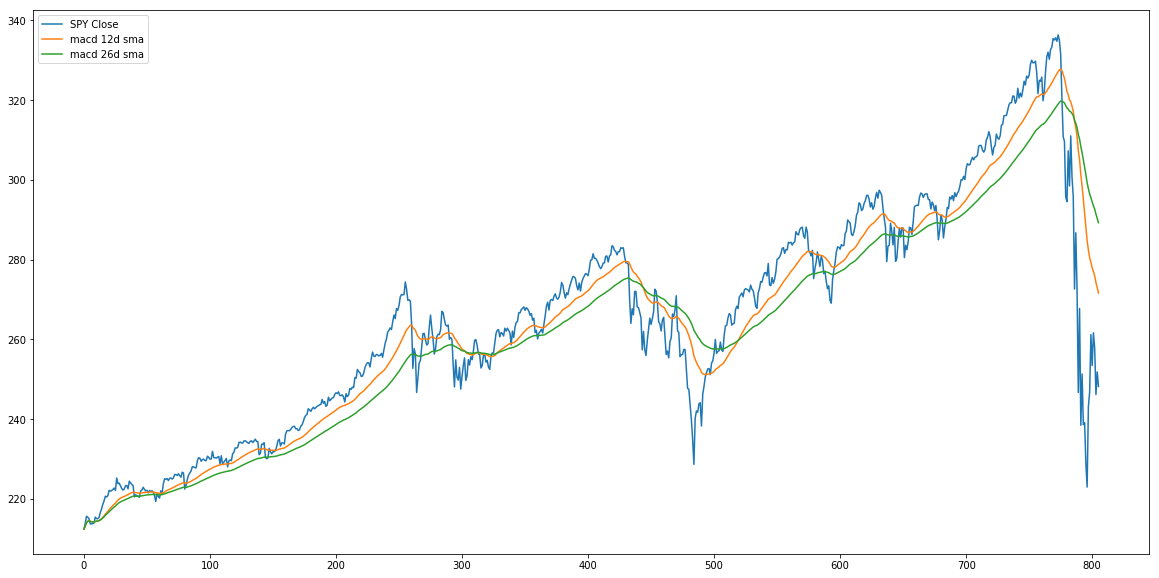

In [13]:
#macd_df.tail(20)
macd_df[["SPY Close",'macd 12d sma','macd 26d sma']].plot(figsize=(20,10))

## RSI

## SMAs

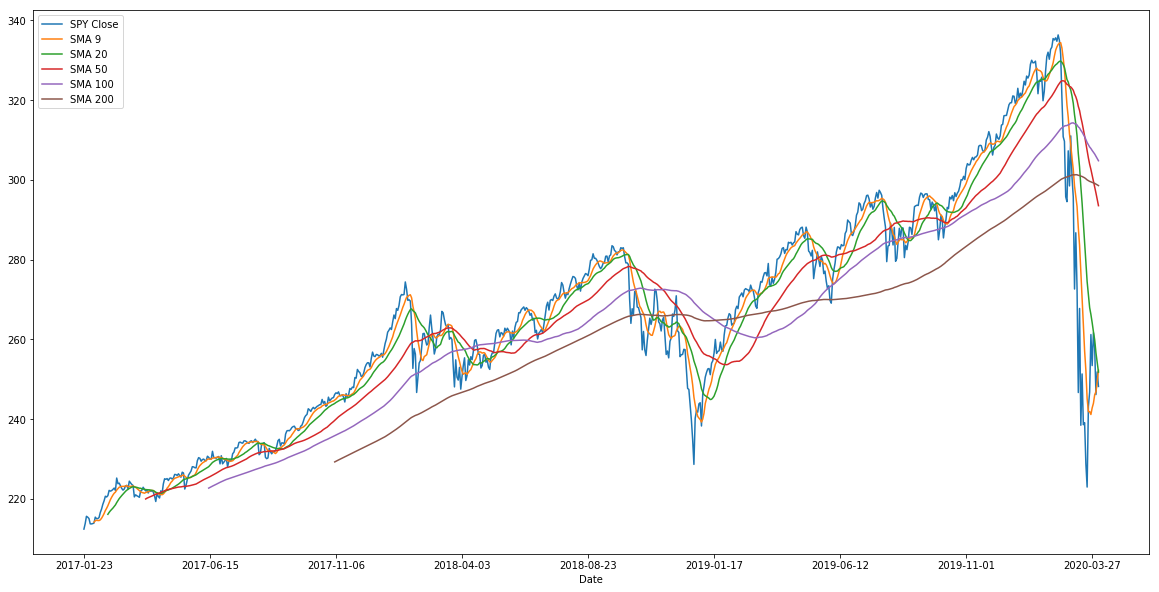

In [15]:
sma_close = spy_df[["Date", "SPY Close"]].set_index("Date")

spy_sma_9 = sma_close.rolling(window=9).mean()
spy_sma_20 = sma_close.rolling(window=20).mean()
spy_sma_50 = sma_close.rolling(window=50).mean()
spy_sma_100 = sma_close.rolling(window=100).mean()
spy_sma_200 = sma_close.rolling(window=200).mean()

#sma_df = pd.concat([[spy_sma_9, spy_sma_20, spy_sma_50, spy_sma_100, spy_sma_200]])#, index_col="Date")
#sma_df.head(10)
#print(spy_sma_9[:20])

sma_close['SMA 9'] = pd.DataFrame(spy_sma_9)
sma_close['SMA 20'] = pd.DataFrame(spy_sma_20)
sma_close['SMA 50'] = pd.DataFrame(spy_sma_50)
sma_close['SMA 100'] = pd.DataFrame(spy_sma_100)
sma_close['SMA 200'] = pd.DataFrame(spy_sma_200)

#spy_close.tail()
sma_close[["SPY Close",'SMA 9','SMA 20', 'SMA 50', 'SMA 100', 'SMA 200']].plot(figsize=(20,10))

In [16]:
sma_close['SPY Close']

Date
2017-01-23    212.407181
2017-01-24    213.769119
2017-01-25    215.619400
2017-01-26    215.394012
2017-01-27    215.055878
                 ...    
2020-03-30    261.649994
2020-03-31    257.750000
2020-04-01    246.149994
2020-04-02    251.830002
2020-04-03    248.190002
Name: SPY Close, Length: 806, dtype: float64

In [ ]:
# Construct a crossover trading signal
sma_df['SMA Long'] = np.where(sma_df['SPY Close'] < sma_df['SMA 200'], 1.0, 0.0)
sma_df['SMA Short'] = np.where(sma_df['SPY Close'] > sma_df['macd 26d sma'] + , -1.0, 0.0)

# Construct MACD Signal
sma_df['SMA Signal'] = sma_df['SMA Long'] + sma_df['SMA Short']

## CCI

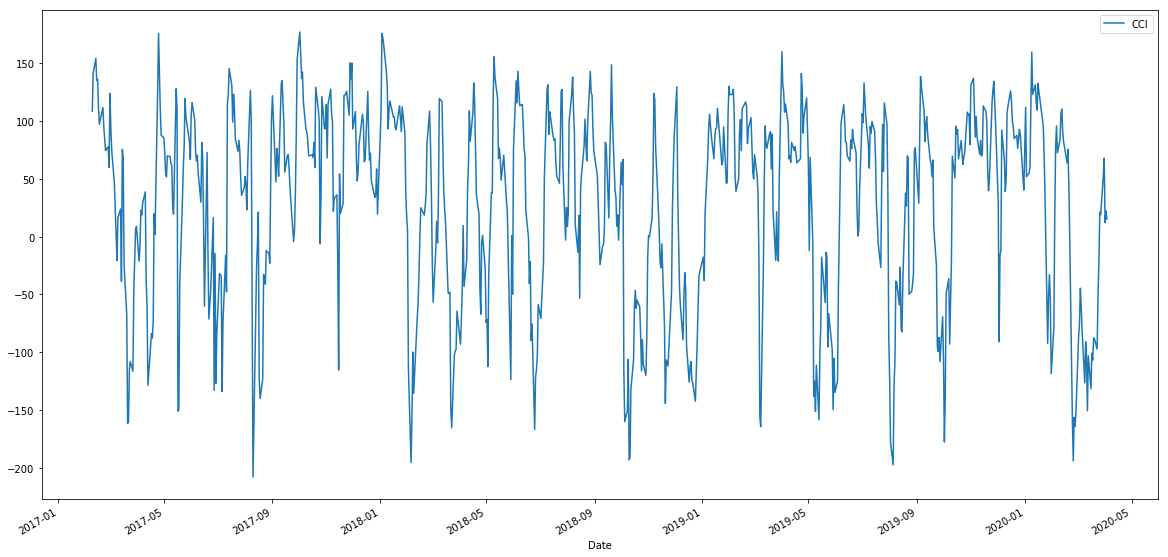

In [18]:
# Commodity Channel Index Python Code

cci_df = pd.DataFrame(spy_px[['Date', 'SPY Close']])

# Commodity Channel Index 
def CCI(data, ndays): 
    TP = (data['High'] + data['Low'] + data['Close']) / 3 
    CCI = pd.Series((TP - TP.rolling(ndays).mean()) / (0.015 * TP.rolling(ndays).std()),
                    name = 'CCI') 
    data = data.join(CCI) 
    return data


# Retrieve the SPY data from Yahoo finance:
data = pdr.get_data_yahoo("SPY", start="2017-01-23", end="2020-04-03") 
data = pd.DataFrame(data)


# Compute the Commodity Channel Index(CCI) for SPY based on the 14-day Moving average
n = 14
SPY_CCI = CCI(data, n)
CCI = SPY_CCI['CCI']
cci_df = pd.DataFrame(CCI)


cci_df.tail()
cci_df[['CCI']].plot(figsize=(20,10))

In [19]:
# Construct a CCI trading signal
cci_df['CCI Long'] = np.where(cci_df['CCI'] < -200, 1.0, 0.0)
cci_df['CCI Short'] = np.where(cci_df['CCI'] > 200, -1.0, 0.0)

# Construct CCI Signal
cci_df['CCI Signal'] = cci_df['CCI Long'] + cci_df['CCI Short']

cci_df.tail(15)

,CCI,CCI Long,CCI Short,CCI Signal
Date,,,,
2020-03-16,-131.696096,0.0,0.0,0.0
2020-03-17,-100.906154,0.0,0.0,0.0
2020-03-18,-106.875010,0.0,0.0,0.0
2020-03-19,-87.650086,0.0,0.0,0.0
2020-03-20,-88.423169,0.0,0.0,0.0
2020-03-23,-97.406583,0.0,0.0,0.0
2020-03-24,-49.907844,0.0,0.0,0.0
2020-03-25,-22.637314,0.0,0.0,0.0
2020-03-26,21.219925,0.0,0.0,0.0
